# K-Nearest Neighbors (K-NN)

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
# Importing prepared dataset
import pickle
input = open('data_LogRegr.pkl', 'rb')
obj = pickle.load(input)
input.close()
X_train = obj["X_train"]
X_test = obj["X_test"]
y_train = obj["y_train"]
y_test = obj["y_test"]

# PARAMETERS

Minimum error:- 0.15416666666666667 at K = 18


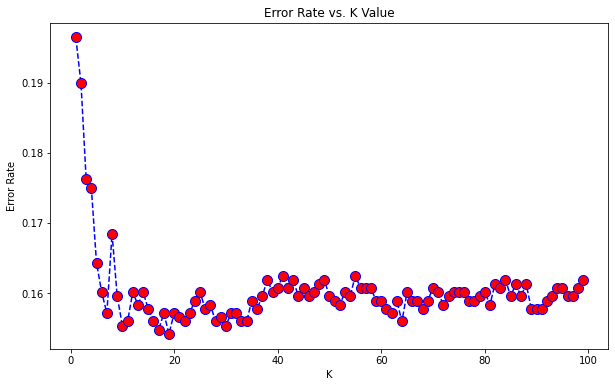

In [3]:
# Optimal K 
from sklearn.neighbors import KNeighborsClassifier
error_rate = []
for i in range(1,100):
     knn = KNeighborsClassifier(n_neighbors=i)
     knn.fit(X_train,y_train)
     pred_i = knn.predict(X_test)
     error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,100),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

На график выведен вектор ошибок. Минимум при количестве соседей равном 18. Для выборки из 8400 наблюдений получен хороший результат.

# Modelling

In [4]:
# Fitting K-NN to the Training set (2 variables)
knn = KNeighborsClassifier(n_neighbors = 18, metric = 'euclidean', p = 2).fit(X_train, y_train)

# Results

In [5]:
# Predicting the Test set results
y_pred = knn.predict(X_test)
knn.score(X_test,y_test)

0.8428571428571429

Получено высокое качество модели. 84% обьектов тестовой выборки распознаны верно. 

In [6]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1104   88]
 [ 176  312]]


Неверно распознано  264 обьекта.

Minimum error:- 0.15416666666666667 at K = 18


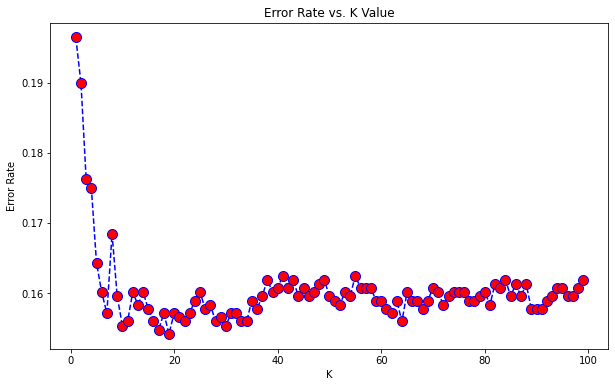

In [7]:
# Optimal K 
from sklearn.neighbors import KNeighborsClassifier
error_rate = []
for i in range(1,100):
     knn1 = KNeighborsClassifier(n_neighbors=i)
     knn1.fit(X_train,y_train)
     pred_i = knn1.predict(X_test)
     error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,100),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

In [8]:
# Fitting K-NN to the Training set (2 variables)
knn1 = KNeighborsClassifier(n_neighbors = 18, metric = 'minkowski', p = 2).fit(X_train, y_train)


In [9]:
# Predicting the Test set results
y_pred = knn1.predict(X_test)
knn1.score(X_test,y_test)

0.8428571428571429

In [10]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test, y_pred)
print(cm1)

[[1104   88]
 [ 176  312]]


ВЫВОДЫ: были построены 2 модели ближайших соседей на разных метриках: Минковски и Эвклидовой. При этом получены одинаковые результаты: модель неверно распознает 264 обьекта. Однако, стоить отметить, что количество правильно распознанных бедных людей больше, чем в логистической регрессии и соответственно меньше количество неверно распознанных наблюдений по данному классу. Поэтому можно отдать предпочтение данной моделе.